### Buissiness Problem

#### a. bulit a good model to predict what is the chance a applier will not default a loan
#### b. who is the good custmer and built questions to qulify the appliers.


In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
df = pd.read_csv('LoansTrainingSet.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


#### 1. find the target feature: Loan Status
#### 2. check the other features, which them are important ones for us to predict from domain knowledge:
####    ' Term'  'Credit Score' 'Annual Income'  'Monthly Debt'  'Years of Credit histoy' 'Current Credit Balance'


In [64]:
# why do you drop 'delinquent' column.

In [36]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [38]:
#we got duplicate IDs in the obserbations, we need to get rid of them later
df['Loan ID'].nunique(),len(df['Loan ID'])

(215700, 256984)

In [41]:
df['Current Loan Amount'].describe()

count    2.569840e+05
mean     1.371331e+07
std      3.438131e+07
min      5.050000e+02
25%      8.299000e+03
50%      1.429800e+04
75%      2.436700e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


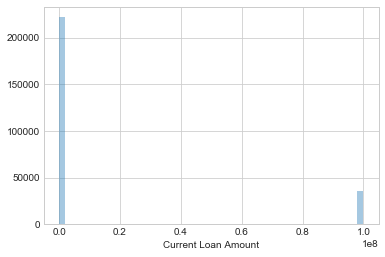

In [40]:
#
sns.distplot(df['Current Loan Amount'],kde=False)
sns.set_style('whitegrid')

In [43]:
df[df['Current Loan Amount']>2.436700e+05]['Current Loan Amount'].head()

10    99999999
16    99999999
23    99999999
28    99999999
42    99999999
Name: Current Loan Amount, dtype: int64

In [11]:
b = df[df['Current Loan Amount']>2.436700e+05]

In [12]:
b['Current Loan Amount'].value_counts()

99999999    35210
Name: Current Loan Amount, dtype: int64

This is I copied from wikipedia

In [44]:
#all of these 99,999,999 seems to be an eccoding of NaN values, let's clean it later
#NaNs may also be explicitly assigned to variables, typically as a representation for missing 
#values. Prior to the IEEE standard, programmers often used a special value 
#(such as −99999999) to represent undefined or missing values, but there was
#no guarantee that they would be handled consistently or correctly

In [14]:
df.Term.value_counts()

Short Term    192632
Long Term      64352
Name: Term, dtype: int64

In [15]:
df['Credit Score'].isnull().value_counts()

False    195308
True      61676
Name: Credit Score, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


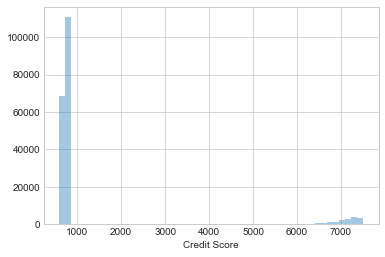

In [16]:
sns.distplot(df['Credit Score'].dropna(),kde=False)

In [17]:
#credit score values are surpposed to be less than 1000. But the histgram shows some outliers
#these outliers are most likely come from tpying error. I will treated by dividing them by 10

In [19]:
df['Years in current job'].isnull().value_counts()

False    245508
True      11476
Name: Years in current job, dtype: int64

In [45]:
df['Years in current job'].value_counts()

10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: Years in current job, dtype: int64

We have missing values and also have to do deal with the value fomart

In [46]:
df['Home Ownership'].value_counts()

Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: Home Ownership, dtype: int64

In [47]:
#In thess distinct values, Home Mortgate means same with Havemortgae, so they can be combined together

In [48]:
df['Annual Income'].isnull().value_counts()

False    195308
True      61676
Name: Annual Income, dtype: int64

In [49]:
df['Purpose'].isnull().value_counts()

False    256984
Name: Purpose, dtype: int64

In [50]:
df['Purpose'].value_counts()

Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: Purpose, dtype: int64

In [51]:
#other and Other actuall mean same thing, will combine them later

In [56]:
df['Monthly Debt'].describe()

count     256984
unique    129115
top        $0.00
freq         254
Name: Monthly Debt, dtype: object

In [57]:
#monthly debt should be float type instead of object

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [60]:
df['Maximum Open Credit'].describe()

count     256984
unique     87188
top            0
freq        1597
Name: Maximum Open Credit, dtype: int64

In [128]:
#Maximum Open Credit should be float type instead of object, also there is missing values to be filled

In [61]:
type(np.NaN)

float